# Importing the necessary libraries

In [11]:
import tensorflow
import torch
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

# Function Definitions

In [12]:
# Function to apply a Sobel Filter
def apply_sobel_filter(image):
    img_array = torch.tensor(image, dtype=float)

    # Defining the Sobel Filters/Kernels - Edge Detection
    sobel_x = torch.tensor([[-1, -2, -1],
                       [0, 0, 0],
                       [1, 2, 1]])

    sobel_y = torch.tensor([[-1, 0, 1],
                       [-2, 0, 2],
                       [-1, 0, 1]])

    image_height = img_array.shape[1]
    image_width = img_array.shape[2]

    # Initializing the Gradients as Array of zeroes
    gradient_x = torch.zeros_like(img_array)
    gradient_y = torch.zeros_like(img_array)

    for num in range(img_array.shape[0]):
        for x in range(1, image_height-1):
            for y in range(1, image_width-1):
                patch = img_array[num][x-1 : x+2, y-1 : y+2]
                gradient_x[num][x, y] = torch.sum(patch * sobel_x)
                gradient_y[num][x, y] = torch.sum(patch * sobel_y)

    gradient_magnitude = torch.sqrt(gradient_x ** 2 + gradient_y ** 2)

    gradient_x = (gradient_x - torch.min(gradient_x)) / (torch.max(gradient_x) - torch.min(gradient_x))
    gradient_y = (gradient_y - torch.min(gradient_y)) / (torch.max(gradient_y) - torch.min(gradient_y))
    gradient_magnitude = (gradient_magnitude - torch.min(gradient_magnitude)) / (torch.max(gradient_magnitude) - torch.min(gradient_magnitude))

    return gradient_x, gradient_y, gradient_magnitude


# Function to display graphs/plot the results
def display_results(image, gradient_x, gradient_y, gradient_magnitude):
    fig, axes = plt.subplots(2, 2, figsize=(12, 12))

    axes[0, 0].imshow(image, cmap='gray')
    axes[0, 0].set_title('Original Image')
    axes[0, 0].axis('off')


    axes[0, 1].imshow(gradient_x, cmap='gray')
    axes[0, 1].set_title('Horizontal Edges (Sobel X)')
    axes[0, 1].axis('off')


    axes[1, 0].imshow(gradient_y, cmap='gray')
    axes[1, 0].set_title('Vertical Edges (Sobel Y)')
    axes[1, 0].axis('off')


    axes[1, 1].imshow(gradient_magnitude, cmap='gray')
    axes[1, 1].set_title('Edge Magnitude')
    axes[1, 1].axis('off')

    plt.tight_layout()
    plt.show()

# Importing the Fashion MNIST dataset

In [13]:
# Importing Fashion MNIST Dataset
(train_image_data, train_image_label), (test_image_data, test_image_label) = tensorflow.keras.datasets.fashion_mnist.load_data()

# Exploring the dataset's shape

In [14]:
# Checking the dataset shape
print("\nTraining Image Data: ", train_image_data.shape)
print("Training Image Labels: ", train_image_label.shape)
print("\nTesting Image Data: ", test_image_data.shape)
print("Testing Image Labels: ", test_image_label.shape)


Training Image Data:  (60000, 28, 28)
Training Image Labels:  (60000,)

Testing Image Data:  (10000, 28, 28)
Testing Image Labels:  (10000,)


# Applying the Sobel Filter to all the training dataset

In [15]:
# Applying Sobel Filter to the dataset
gradient_x, gradient_y, gradient_magnitude = apply_sobel_filter(train_image_data)

# Displaying the First element after applying filters

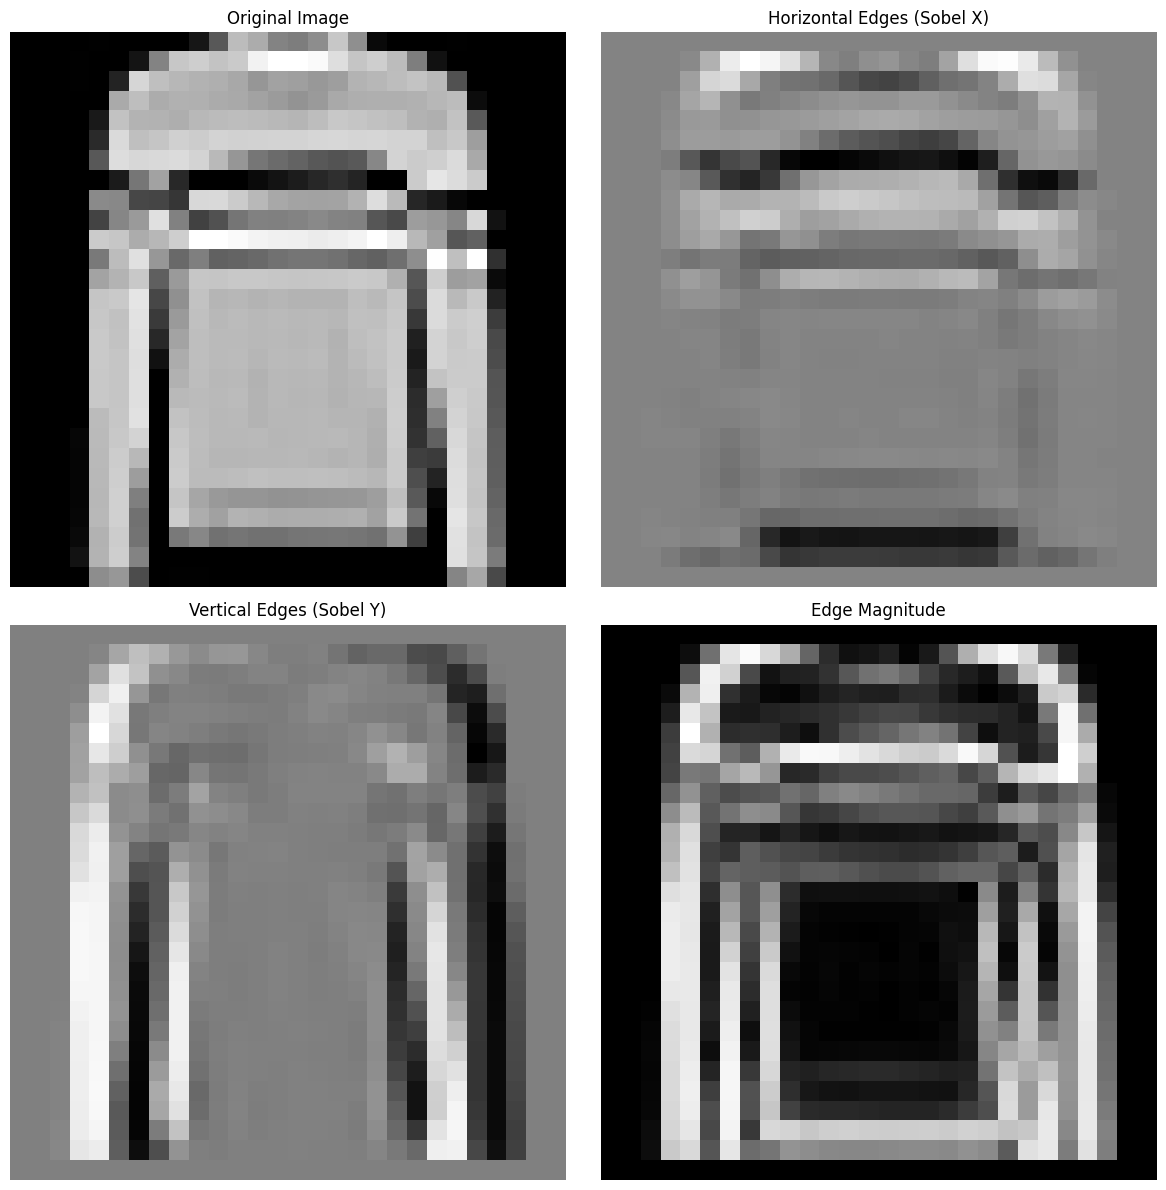

In [16]:
# Displaying the Results after applying the filters
data_index = 5
display_results(train_image_data[data_index], gradient_x[data_index], gradient_y[data_index], gradient_magnitude[data_index])

# Kernel Definitions

In [18]:
kernels = {
    'Edge Detection': torch.tensor([
        [[-1, -1, -1],
         [-1, 8, -1],  
         [-1, -1, -1]],
    ]),
    'Vertical Lines': torch.tensor([
       [-1, 2, -1],
       [-1, 2, -1],
       [-1, 2, -1] 
    ]),
    'Blur': (1/9) * torch.ones((3, 3))
}

# Applying the Convolutions

In [19]:
def apply_convolution(image, kernel):
    return convolve2d(image,  kernel, mode='same')

# Defining the CNN Model Definition

In [20]:
class ConvolutionalNeuralNetworkModel():
    def __init__(self):
        print("Initializing the Neural Network")